# Part 1: Basic KNN Classification

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the penguins dataset
penguins = sns.load_dataset('penguins')
rows, columns = penguins.shape
print(f"Dataset {rows}x{columns}")

print("\nFirst few rows:")
print(penguins.head())

Dataset 344x7

First few rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## What's happening here:

We're importing tools like a chef gathering ingredients before cooking

penguins dataset contains measurements of different penguin species

Each row is one penguin, each column is a characteristic (bill length, flipper length, etc.)

In [14]:
# Data preprocessing
print("Missing values before cleaning:")
print(penguins.isnull().sum())

# Drop rows with missing values
penguins_clean = penguins.dropna()
print(f"\nDataset after cleaning: {penguins_clean.shape}")

# Select features and target
features = [
            'bill_length_mm', 
            'bill_depth_mm', 
            'flipper_length_mm', 
            'body_mass_g'
          ]

X = penguins_clean[features]
y = penguins_clean['species']

print(f"\nFeatures: {features}")
print("Target classes:", y.unique())

Missing values before cleaning:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Dataset after cleaning: (333, 7)

Features: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Target classes: ['Adelie' 'Chinstrap' 'Gentoo']


## Key Concepts:

- Features (X): The measurements we use to predict (like clues)
- Target (y): What we're trying to predict (the answer - penguin species)
- Data Cleaning: Removing incomplete data so our model works properly

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Class distribution in training set:\n{y_train.value_counts()}")

Training set size: 233
Test set size: 100
Class distribution in training set:
species
Adelie       102
Gentoo        83
Chinstrap     48
Name: count, dtype: int64


In [15]:
# Feature scaling - CRITICAL for KNN!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters AND transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data using SAME parameters

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 means look at 5 nearest neighbors
knn.fit(X_train_scaled, y_train)           # "Learn" from the training data

# Make predictions on test data
y_pred = knn.predict(X_test_scaled)        # Predict species for test penguins

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Compare predictions with actual species
print(f"KNN Accuracy (k=5): {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy (k=5): 1.0000

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



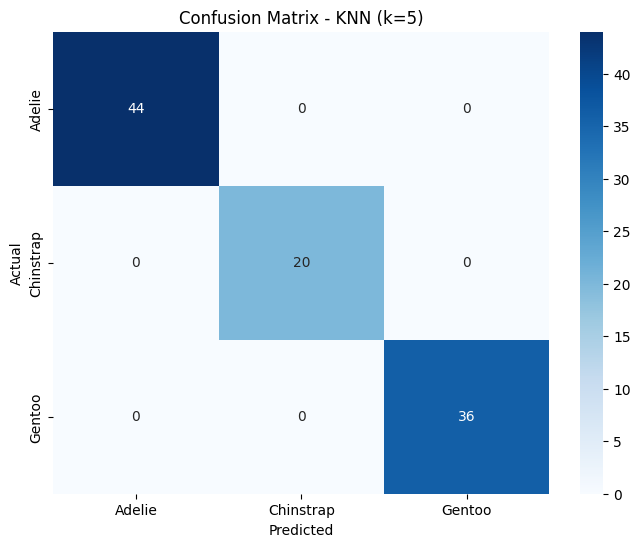

In [5]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix - KNN (k=5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Part 2: Optimal K value

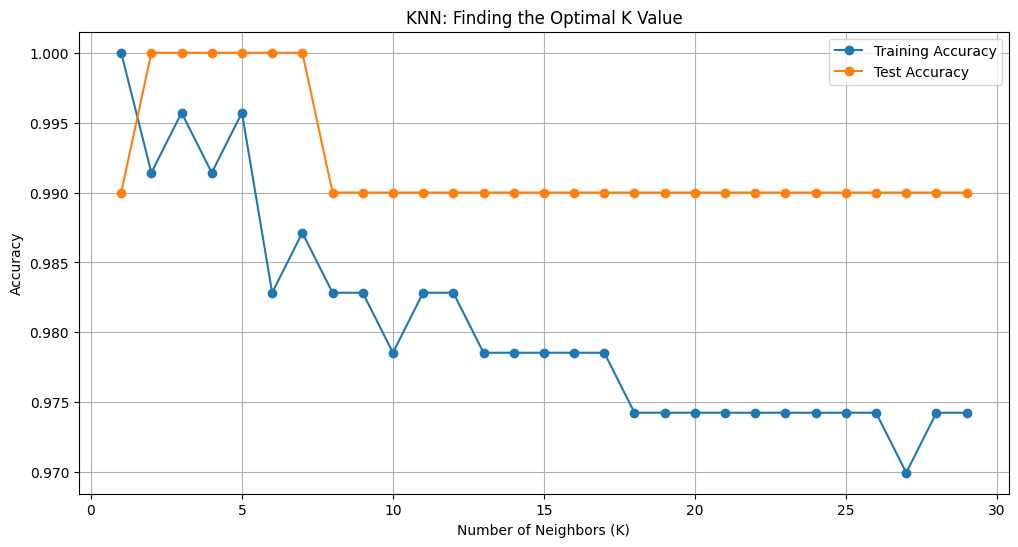

Optimal K: 2 with test accuracy: 1.0000


In [ ]:
# Sweep different K values (number of neighbors) to observe bias-variance tradeoff.
# Lower K (e.g., 1) can overfit (high variance). Larger K can underfit (high bias).
# Goal: pick a K that generalizes well (good test accuracy) without overfitting.

k_values = range(1, 30)  # Candidate neighbor counts to evaluate
train_scores = []        # Will store accuracy on training set (helps spot overfitting)
test_scores = []         # Will store accuracy on test set (proxy for generalization)

for k in k_values:
    # Instantiate a fresh KNN model for this k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)  # Train on scaled training data

    # Record performance. If train >> test accuracy, likely overfitting.
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot training vs test accuracy across K to visually pick a stable region.
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Finding the Optimal K Value')
plt.legend()
plt.grid(True)
plt.show()

# Select K with highest test set accuracy.
# Note: In production you would typically use cross-validation (e.g., GridSearchCV)
# rather than a single train/test split for more robust selection.
best_k = k_values[np.argmax(test_scores)]
best_accuracy = max(test_scores)
print(f"Optimal K: {best_k} with test accuracy: {best_accuracy:.4f}")

# Part 3: KNN For regression

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use KNN for regression - predict body mass
features_reg = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X_reg = penguins_clean[features_reg]
y_reg = penguins_clean['body_mass_g']

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg_scaled)

# Evaluate regression
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("KNN Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

KNN Regression Results:
Mean Squared Error: 97485.25
R² Score: 0.8381


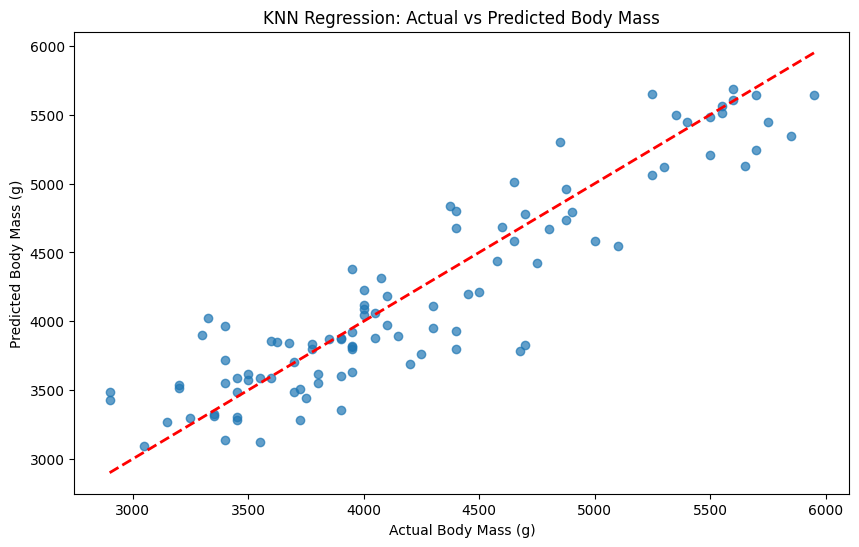

In [ ]:
# Visualize regression predictions vs actual values to spot systematic errors.
# Ideal outcome: points lie along the red diagonal line (perfect predictions).
# Deviations show prediction error. Check for patterns:
#   - Points consistently above/below line = bias
#   - Wide scatter = high variance / poor fit
#   - Clusters off the line = the model struggles with certain value ranges

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, edgecolors='k', linewidth=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.title('KNN Regression: Actual vs Predicted Body Mass')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Part 4: Cross validation

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation to get more reliable accuracy estimate
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [1.         0.9787234  0.9787234  0.97826087 0.97826087]
Mean CV accuracy: 0.9828 (+/- 0.0172)


In [10]:
# Hyperparameter tuning with GridSearch
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_gs = KNeighborsClassifier()
grid_search = GridSearchCV(knn_gs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Test best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test accuracy with best model: {best_accuracy:.4f}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.9913968547641072
Test accuracy with best model: 0.9900


# Part 5: KNN decision boundaries

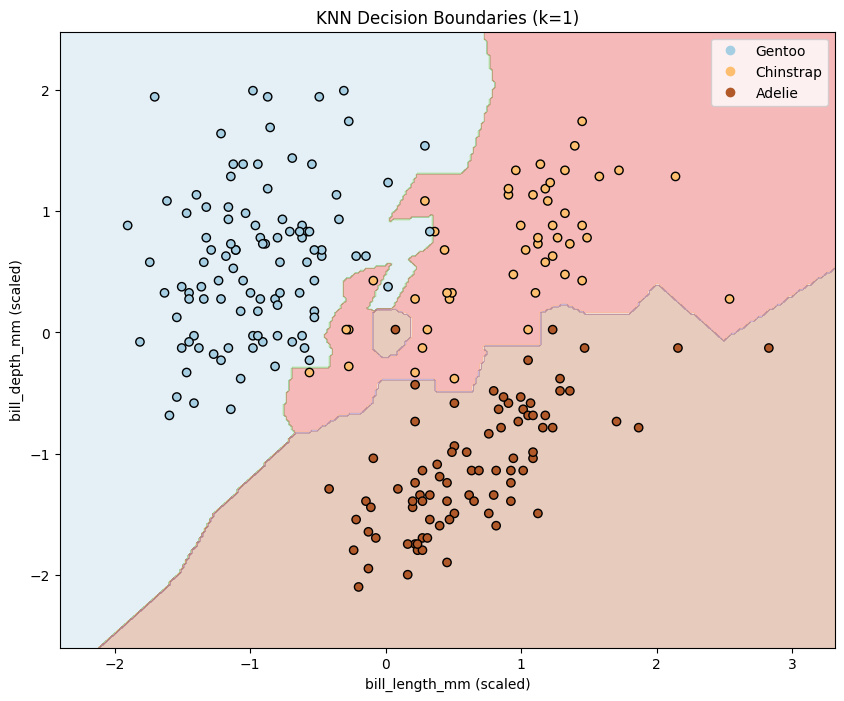

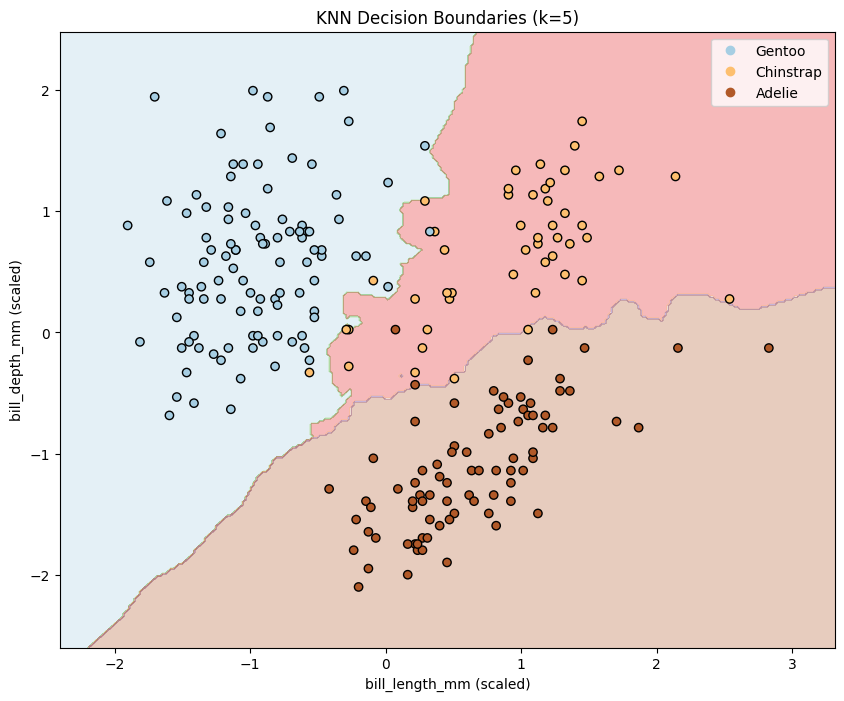

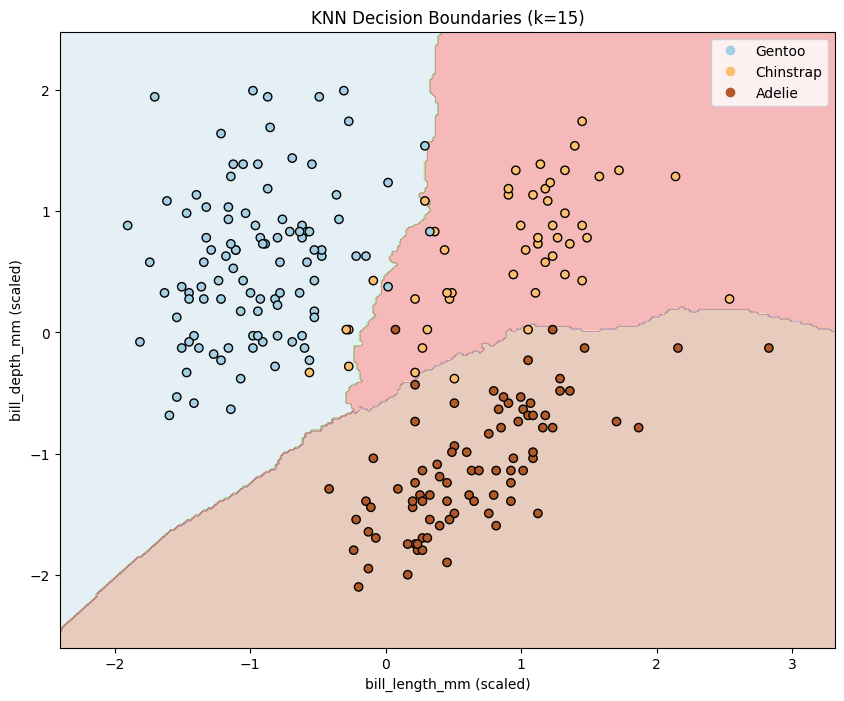

In [11]:
# Visualize decision boundaries with 2 features
def plot_knn_boundary(X, y, k, feature1, feature2):
    # Select only two features for visualization
    X_vis = X[[feature1, feature2]]
    
    # Scale the features
    scaler_vis = StandardScaler()
    X_vis_scaled = scaler_vis.fit_transform(X_vis)
    
    # Train KNN
    knn_vis = KNeighborsClassifier(n_neighbors=k)
    knn_vis.fit(X_vis_scaled, y)
    
    # Create mesh grid
    h = 0.02
    x_min, x_max = X_vis_scaled[:, 0].min() - 0.5, X_vis_scaled[:, 0].max() + 0.5
    y_min, y_max = X_vis_scaled[:, 1].min() - 0.5, X_vis_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.Categorical(Z).codes
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    scatter = plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=pd.Categorical(y).codes, 
                         cmap=plt.cm.Paired, edgecolor='black')
    plt.xlabel(f'{feature1} (scaled)')
    plt.ylabel(f'{feature2} (scaled)')
    plt.title(f'KNN Decision Boundaries (k={k})')
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=list(y.unique()))
    plt.show()

# Plot for different K values
plot_knn_boundary(X_train, y_train, k=1, feature1='bill_length_mm', feature2='bill_depth_mm')
plot_knn_boundary(X_train, y_train, k=5, feature1='bill_length_mm', feature2='bill_depth_mm')
plot_knn_boundary(X_train, y_train, k=15, feature1='bill_length_mm', feature2='bill_depth_mm')

# Part 6: Importance

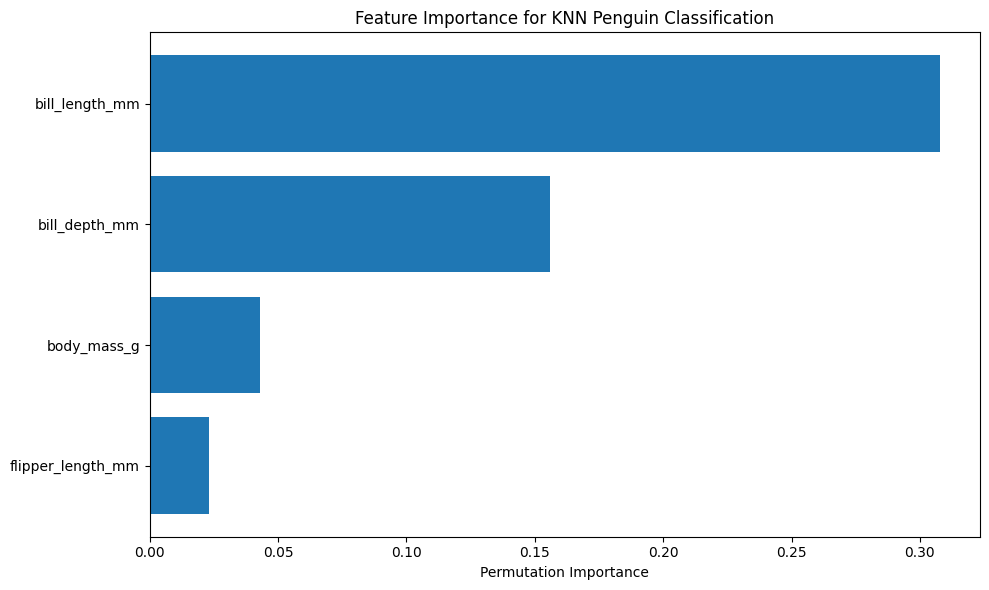

Feature importance scores:
bill_length_mm: 0.3080
bill_depth_mm: 0.1560
body_mass_g: 0.0430
flipper_length_mm: 0.0230


In [12]:
# Analyze which features are most important for KNN
from sklearn.inspection import permutation_importance

# Fit the best model on all training data
best_knn.fit(X_train_scaled, y_train)

# Calculate permutation importance
result = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = result.importances_mean.argsort()
plt.barh(np.array(features)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for KNN Penguin Classification')
plt.tight_layout()
plt.show()

print("Feature importance scores:")
for i in sorted_idx[::-1]:
    print(f"{features[i]}: {result.importances_mean[i]:.4f}")